In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import knn

In [2]:
# Taken directly from q4.py
def knn_train_test(k, xTrain, yTrain, xTest, yTest):
    """
    Given a specified k, train the knn model and predict
    the labels of the test data. Returns the accuracy of
    the resulting model.

    Parameters
    ----------
    k : int
        The number of neighbors
    xTrain : nd-array with shape n x d
        Training data 
    yTrain : 1d array with shape n
        Array of labels associated with training data.
    xTest : nd-array with shape m x d
        Test data 
    yTest : 1d array with shape m
        Array of labels associated with test data.

    Returns
    -------
    acc : float
        The accuracy of the trained knn model on the test data
    """
    model = knn.Knn(k)
    model.train(xTrain, yTrain['label'])
    # predict the train and test datasets
    yHatTrain = model.predict(xTrain)
    yHatTest = model.predict(xTest)
    return (knn.accuracy(yHatTrain, yTrain['label']), knn.accuracy(yHatTest, yTest['label']), k)

In [3]:
xTrain = pd.read_csv("q3xTrain.csv")
yTrain = pd.read_csv("q3yTrain.csv")
xTest = pd.read_csv("q3xTest.csv")
yTest = pd.read_csv("q3yTest.csv")

In [4]:
# Accuracy should be (train acc, test acc)
accuracy = []
for k in range(1, 23, 2):  # iterates through only odd numbers
    accuracy.append(knn_train_test(k, xTrain, yTrain, xTest, yTest))

In [5]:
print(accuracy)

[(1.0, 0.885, 1), (0.941, 0.92, 3), (0.937, 0.924, 5), (0.937, 0.927, 7), (0.93, 0.931, 9), (0.929, 0.928, 11), (0.93, 0.926, 13), (0.931, 0.928, 15), (0.928, 0.93, 17), (0.927, 0.932, 19), (0.93, 0.931, 21)]


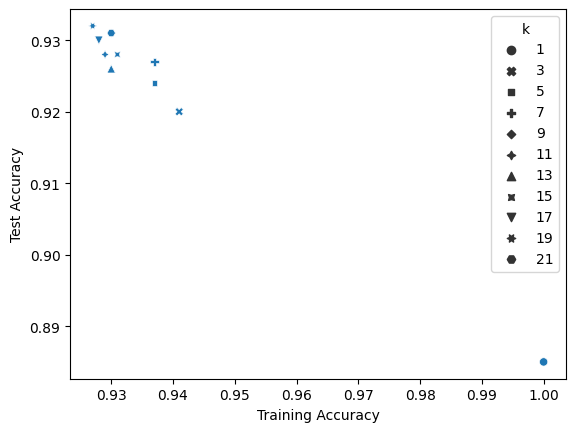

In [6]:
df = pd.DataFrame(accuracy, columns=["Training Accuracy", "Test Accuracy", "k"])
sns.scatterplot(data=df, x="Training Accuracy", y="Test Accuracy", style="k", legend="full")
plt.show()